# Краткая информация

>KNN - k-ближайших соседей (англ. k-nearest neighbors algorithm) — метрический алгоритм для автоматической классификации объектов или регрессии. 

- В случае использования метода для классификации объект присваивается тому классу, который является наиболее распространённым среди k-соседей данного элемента, классы которых уже известны. 
- В случае использования метода для регрессии, объекту присваивается среднее значение по ближайшим к нему объектам, значения которых уже известны. Алгоритм может быть применим к выборкам с большим количеством атрибутов (многомерным). Для этого перед применением нужно определить функцию расстояния, например, евлидова метрика

# Лабораторная работа

In [1]:
# Используемые библиотеки

import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

#inline matplotlib

In [2]:
# Загружаем датасет

iris = datasets.load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


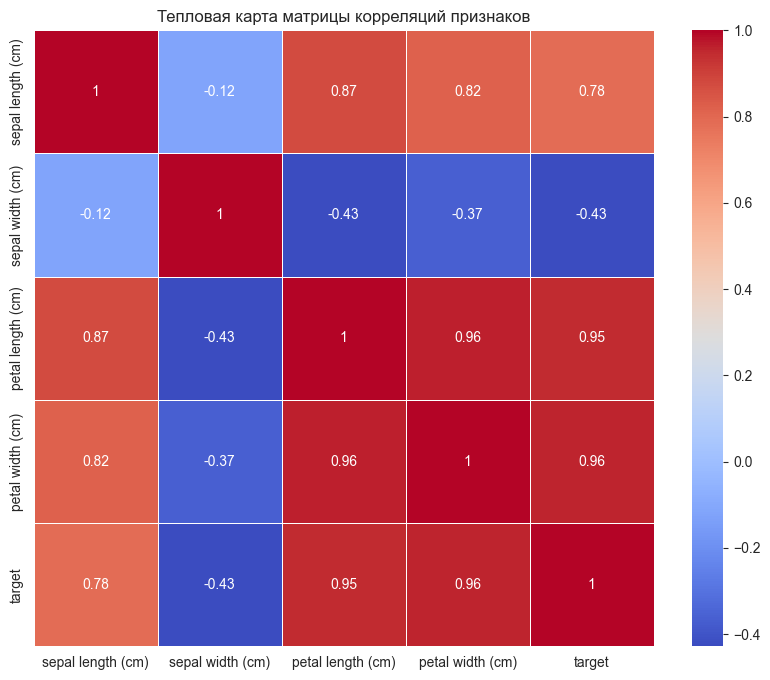

In [3]:
# Получаем матрицу корреляций
correlation_matrix = iris_df.corr()

# Строим тепловую карту
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Тепловая карта матрицы корреляций признаков')
plt.show()

In [4]:
# Получение выборок

X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [5]:
# Обучение модели на разных значениях k

k_range = range(1, 11)
acc_scores = {}
acc_scores_list = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc_scores[k] = metrics.accuracy_score(y_test, y_pred)
    acc_scores_list.append(acc_scores[k])
    
acc_scores

{1: 1.0,
 2: 1.0,
 3: 1.0,
 4: 1.0,
 5: 1.0,
 6: 1.0,
 7: 0.9666666666666667,
 8: 1.0,
 9: 0.9666666666666667,
 10: 0.9666666666666667}

Text(0, 0.5, 'Точность')

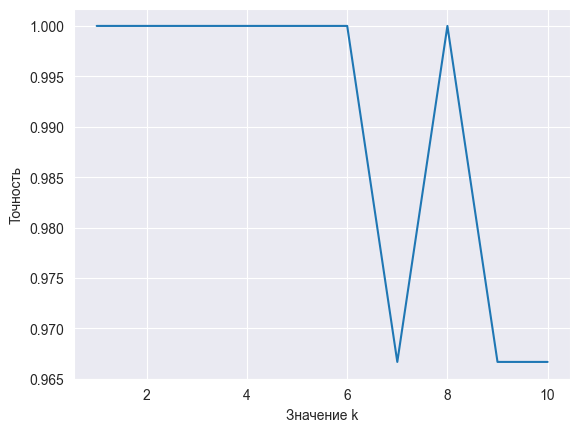

In [6]:
plt.plot(k_range, acc_scores_list, )
plt.xlabel("Значение k")
plt.ylabel("Точность")